# Assignment 2 - Text Classification Benchmarks

In [3]:

# system tools
import os
import sys
sys.path.append("..")

# data munging tools
import pandas as pd
import utils.classifier_utils as clf

# Machine learning stuff
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn import metrics

# Visualisation
import matplotlib.pyplot as plt

In [4]:
#Load the data by first writing the datapath
filename = os.path.join("..", "in", "fake_or_real_news.csv")

#Load it as a csv file
data = pd.read_csv(filename, index_col=0)

In [5]:
#create variables from the dataframe, I just created

X = data["text"]
y = data["label"]

In [6]:
#I split the date up into sections to train with and test with
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [8]:
#Then I create a vectorizer object
vectorizer = TfidfVectorizer(ngram_range = (1,2),
                            lowercase = True,
                            max_df = 0.95,
                            min_df = 0.05,
                            max_features = 100)


In [9]:
#Then I fit the vectorizer to the data
X_train_feats = vectorizer.fit_transform(X_train)

X_test_feats = vectorizer.transform(X_test)

feature_names = vectorizer.get_feature_names_out()

In [10]:
#Then I fit the classifier to the data, in this case the a logistic regression classifier 
classifier = LogisticRegression(random_state=42).fit(X_train_feats, y_train)

In [11]:
#I get the predictions for the labels using the trained model

y_pred = classifier.predict(X_test_feats)

In [12]:
#finding out which features are the most informative when trying to predict a label
clf.show_features(vectorizer, y_train, classifier, n=20)

FAKE				REAL

-4.3803	by             		5.3471	republican     
-3.6202	us             		5.2193	said           
-2.7769	you            		3.7399	obama          
-2.6218	just           		3.4983	state          
-2.1811	this           		2.8368	who            
-1.8911	be             		2.7182	that           
-1.7431	to the         		2.6008	president      
-1.7128	that the       		2.3978	than           
-1.6080	with           		2.1384	campaign       
-1.5910	into           		2.1343	more           
-1.4974	been           		2.1314	party          
-1.3538	is             		2.1239	two            
-1.3343	was            		2.0176	on the         
-1.3270	which          		1.8099	states         
-1.1413	of             		1.7531	could          
-1.0842	now            		1.7189	most           
-1.0386	their          		1.6430	he             
-0.9210	they           		1.6219	in             
-0.8902	so             		1.5984	she            


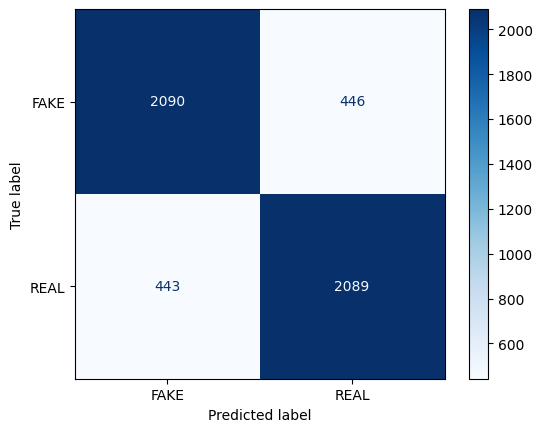

In [13]:
#I use a confusion matrix to check the performance of the model
metrics.ConfusionMatrixDisplay.from_estimator(classifier, X_train_feats,
                                            y_train,
                                            cmap = plt.cm.Blues,
                                            labels = ["FAKE", "REAL"])

In [14]:
#Create a classification report
classifier_metrics = metrics.classification_report(y_test, y_pred)
print(classifier_metrics)

              precision    recall  f1-score   support

        FAKE       0.84      0.81      0.82       628
        REAL       0.82      0.85      0.83       639

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267



In [15]:
#Creating a cross-validation to check the model performance in a different way
X_vect = vectorizer.fit_transform(X)

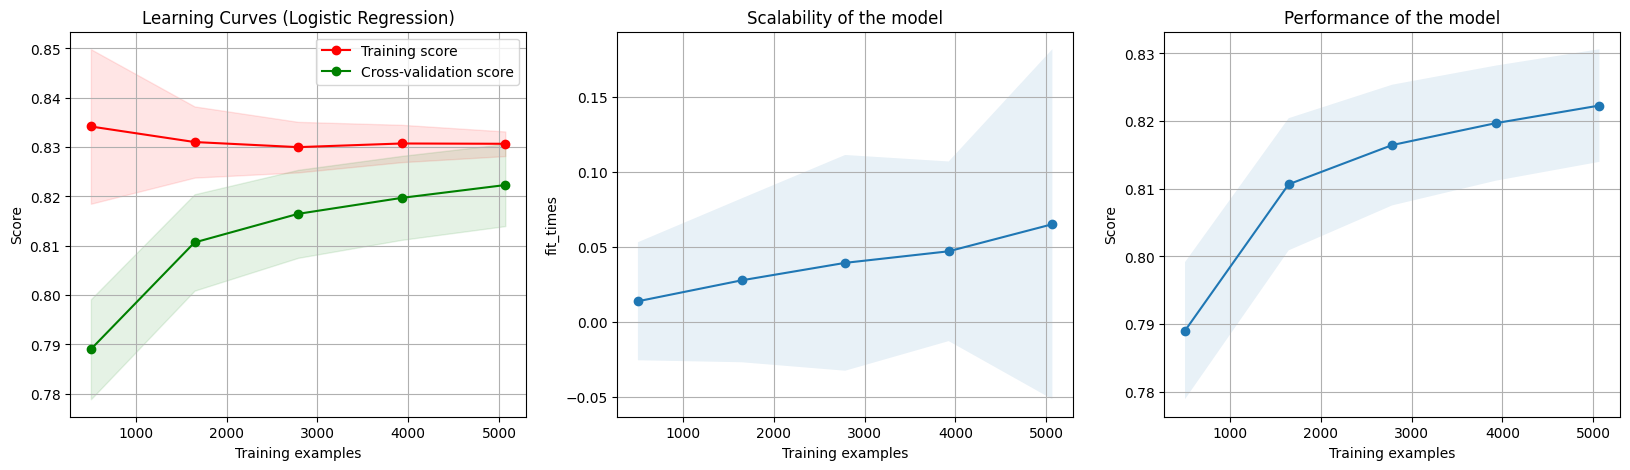

In [16]:
#Plotting the cross-validation
title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression(random_state=42)
clf.plot_learning_curve(estimator, title, X_vect, y, cv=cv, n_jobs=4)

In [17]:
#saving the model and vectorizer
from joblib import dump, load
dump(classifier, os.path.join("..", "models","LR_classifier.joblib"))
dump(vectorizer, os.path.join("..", "models","tfidf_vectorizer.joblib"))

['../models/tfidf_vectorizer.joblib']

In [18]:
#Saving the classifier report
text_file = open("../out/linear.txt", 'w')
text_file.write(classifier_metrics)
text_file.close()